In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Step1. 下載資料

In [2]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

# Step2. 區分訓練集與測試集 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=1)

# Step3. 建模
## n_neighbors : K
## weights: 'uniform' / 'distance' / 其他
## algorithm: 'auto' / 'brute' / 'kd_tree' / 'ball_tree'
## p: 1→曼哈頓距離 / 2→歐基里德距離 / 其他: 明氏距離

In [4]:
clf=KNeighborsClassifier(n_neighbors=3,p=2,weights='distance',algorithm='brute')
clf.fit(X_train,y_train) 
# weights:uniform 等權重 distance 加權重 越近越高
# algorithm brute每個點都計算一次 樣本點少可以 kd_tree 按照樹狀結構找到最接近的點 ball_tree 樹狀結構按照半徑決定要不要取

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

# Step4. 預測

In [5]:
clf.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

# Step5. 準確程度評估

In [6]:
clf.score(X_test,y_test)

0.9777777777777777

In [7]:
clf.score(X_train,y_train)

1.0

# Step6. 尋找合適的K

In [8]:
len(X_train)

105

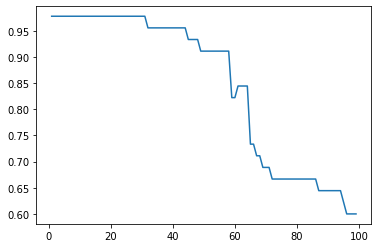

In [9]:
accuracy = []

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)                 
    y_pred = knn.predict(X_test)              
    accuracy.append(metrics.accuracy_score(y_test, y_pred)) 

k_range = range(1,100) #K值越大準確度越低 0-30準確度最高
plt.plot(k_range, accuracy)
plt.show()